# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [50]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # convert kelvin to celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = np.datetime_as_string(np.datetime64(city_weather["dt"], "s"), "D")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | tofol
Processing Record 7 of Set 1 | toga village
City not found. Skipping...
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | sohagi
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | kudahuvadhoo
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | kem'
Processing Record 18 of Set 1 | sydney
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of 

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,3.72,79,70,5.28,GL,2023-06-28
1,port-aux-francais,-49.3500,70.2167,3.93,91,100,5.86,TF,2023-06-28
2,utrik,11.2278,169.8474,27.93,74,100,9.09,MH,2023-06-28
3,grytviken,-54.2811,-36.5092,-6.20,75,17,4.37,GS,2023-06-28
4,bengkulu,-3.8004,102.2655,24.22,92,28,2.60,ID,2023-06-28


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,3.72,79,70,5.28,GL,2023-06-28
1,port-aux-francais,-49.3500,70.2167,3.93,91,100,5.86,TF,2023-06-28
2,utrik,11.2278,169.8474,27.93,74,100,9.09,MH,2023-06-28
3,grytviken,-54.2811,-36.5092,-6.20,75,17,4.37,GS,2023-06-28
4,bengkulu,-3.8004,102.2655,24.22,92,28,2.60,ID,2023-06-28


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

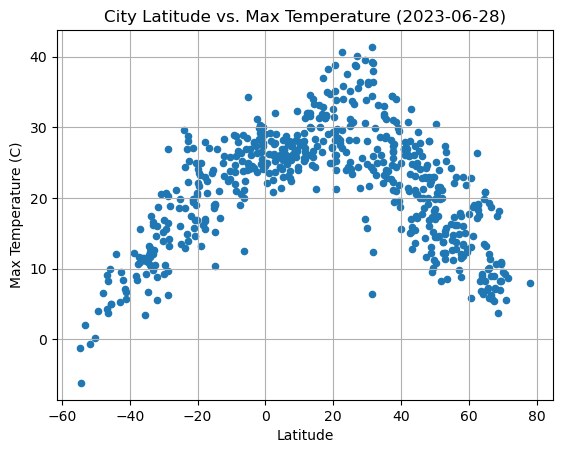

In [56]:
# Build scatter plot for latitude vs. temperature
fig = city_data_df.plot.scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-06-28)")
plt.grid(True, axis="both")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

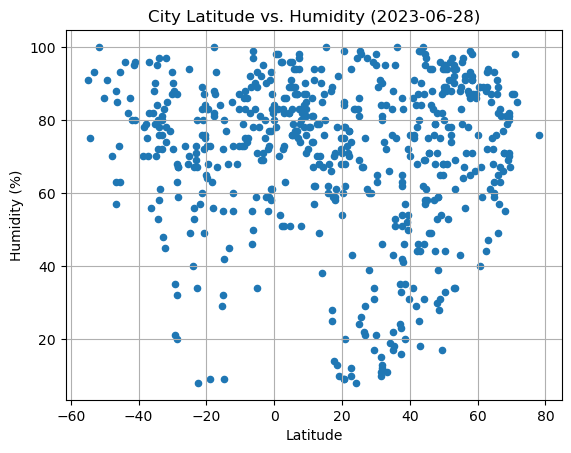

In [57]:
# Build the scatter plots for latitude vs. humidity
fig = city_data_df.plot.scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-06-28)")
plt.grid(True, axis="both")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

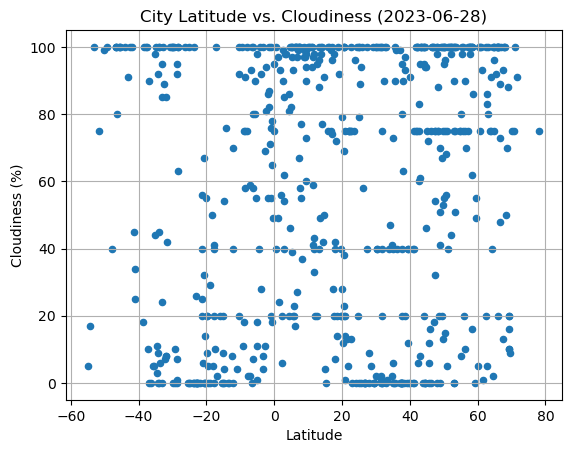

In [58]:
# Build the scatter plots for latitude vs. cloudiness
fig = city_data_df.plot.scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-06-28)")
plt.grid(True, axis="both")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

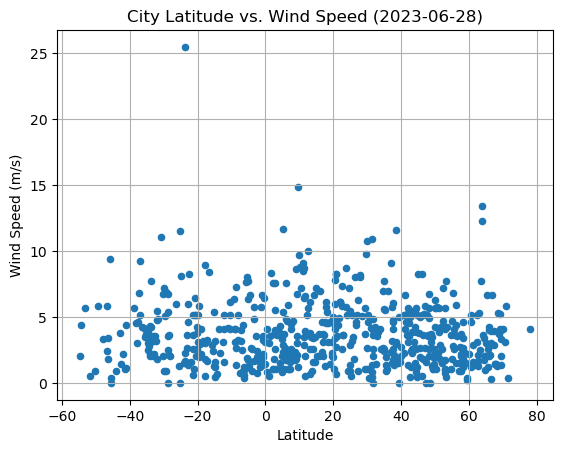

In [59]:
# Build the scatter plots for latitude vs. wind speed
fig = city_data_df.plot.scatter("Lat", "Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-06-28)")
plt.grid(True, axis="both")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def lin_regress(df: pd.DataFrame, x: str, y: str) -> None:
    slope, intercept, rvalue, pvalue, stderr = linregress(df[x], df[y])
    print(f"The r-value is: {rvalue}")
    df.plot.scatter(x, y)

    regress_values = df[x] * slope + intercept
    plt.plot(df[x], regress_values, "r-")

    # decide location for annotation
    miny = df[y].min()
    height = df[y].max() - miny
    regress_begin = df[x].min() * slope + intercept
    if (regress_begin - miny) / height < 0.5:
        loc = (0.05, 0.90)
    else:
        loc = (0.05, 0.05)

    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation, loc, xycoords="axes fraction", fontsize=15, color="red")

    if x == "Lat":
        plt.xlabel("Latitude")
    elif x == "Lon":
        plt.xlabel("Longitude")

    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,3.72,79,70,5.28,GL,2023-06-28
2,utrik,11.2278,169.8474,27.93,74,100,9.09,MH,2023-06-28
5,tofol,5.3248,163.0078,28.24,76,100,5.35,FM,2023-06-28
7,sohagi,24.9833,81.7000,30.23,69,100,0.92,IN,2023-06-28
8,tazovsky,67.4667,78.7000,8.99,77,93,3.95,RU,2023-06-28


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.93,91,100,5.86,TF,2023-06-28
3,grytviken,-54.2811,-36.5092,-6.20,75,17,4.37,GS,2023-06-28
4,bengkulu,-3.8004,102.2655,24.22,92,28,2.60,ID,2023-06-28
6,puerto natales,-51.7236,-72.4875,-0.75,100,75,0.51,CL,2023-06-28
9,waitangi,-43.9535,-176.5597,12.12,96,100,0.89,NZ,2023-06-28


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6782500185794018


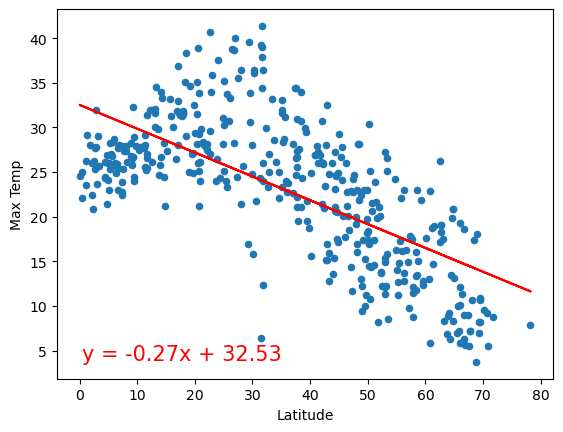

In [63]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.8621343203437946


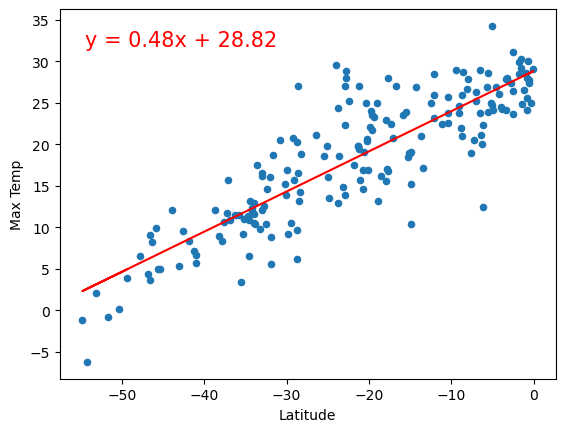

In [64]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** It's pretty close to the summer solstice, so one would expect that the highest temperatures would be at 30 degrees N Latitude (Tropic of Cancer) and would decrease as one got farther away. That is exactly what is shown. Since the Tropic of Cancer is in the northern hemisphere, the highest point would not be at the edge for that, which would cause the linear regression line to have a more horizontal slope. (A parabolic regression would fit better for the northern hemisphere.)

The northern hemisphere's regression slope will always be negative, since the higher numbers are farther from the equator, while the southern hemisphere's regression slope will always be positive, since the higher numbers are closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01894016731205986


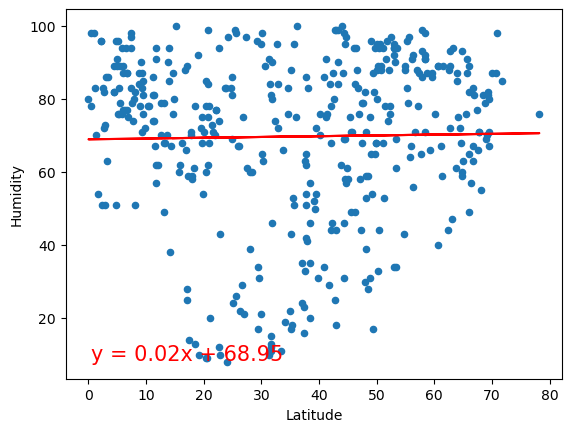

In [65]:
# Northern Hemisphere
lin_regress(northern_hemi_df, "Lat", "Humidity")

The r-value is: -0.08315246443704809


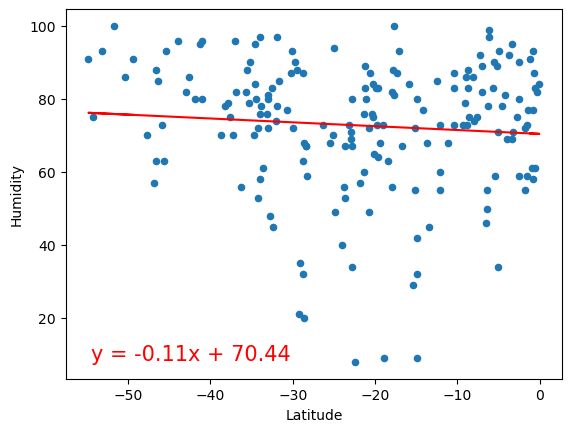

In [66]:
# Southern Hemisphere
lin_regress(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** This is also correlated to the current date being close to the summer solstice, though it has inverse results, due, I believe, to water vapor moving more rapidly in higher temperatures, leaving the ground drier. I'm not a meteorologist or climatologist, so I couldn't explain how the individual climate impacts this more so than temperature does, but the much weaker correlation does mean that there are other stronger factors in determining humidity than just temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.014577079994378517


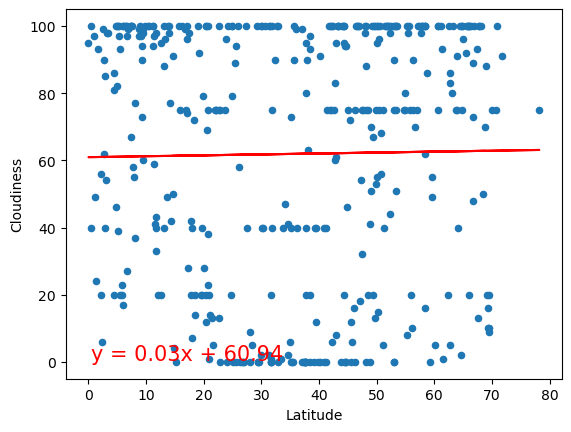

In [67]:
# Northern Hemisphere
lin_regress(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: -0.07912363230864775


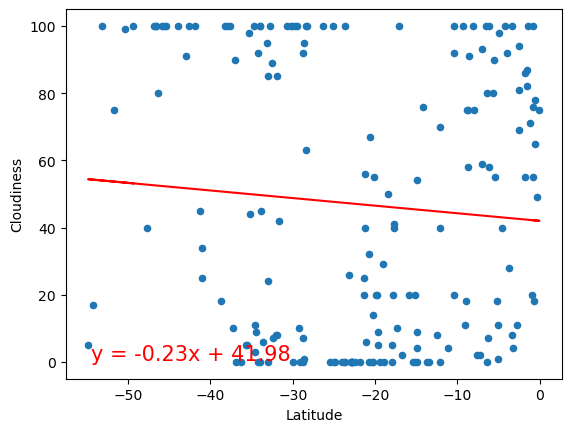

In [68]:
# Southern Hemisphere
lin_regress(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** The same summer solstice idea holds here, as well, though the individual numbers vary far more wildly, I would guess due to the height and comparative coolness of the location where clouds move. We still see less airborne water due to higher temperatures causing the gases to move away to lower-pressure areas more quickly.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.12496908982406904


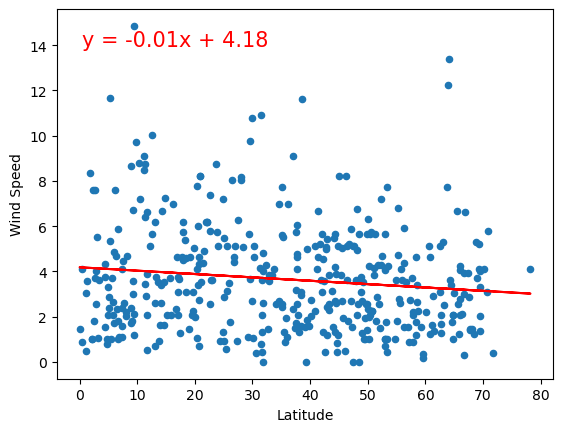

In [69]:
# Northern Hemisphere
lin_regress(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: -0.05812915369718209


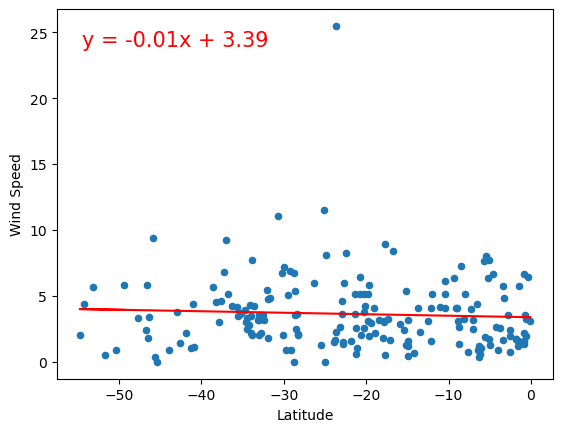

In [70]:
# Southern Hemisphere
lin_regress(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** It seems as if wind speed is barely related to latitude at all. The regression slopes are practically zero, implying that whatever is causing windspeed fluctuations is entirely unrelated.